# CSGO round winner prediction

# What is CSGO?

> CSGO(Counter Strike Global-Offencive) is a round based tactical shooter between CT(Counter terrorist) and T(Terrorist) where we buy equipments usig in game cash that is provided by the game in each round. The overall goal is that the terrorist must plant a bomb while the counter terrorist must stop them or defuse the bomb.

In [2]:
import sys
print(sys.executable)

f:\CSGO-Round-Winner-Prediction-main\csgo\Scripts\python.exe


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier 

In [5]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [6]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


# Data preprocessing


In [7]:
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

<Axes: xlabel='count', ylabel='round_winner'>

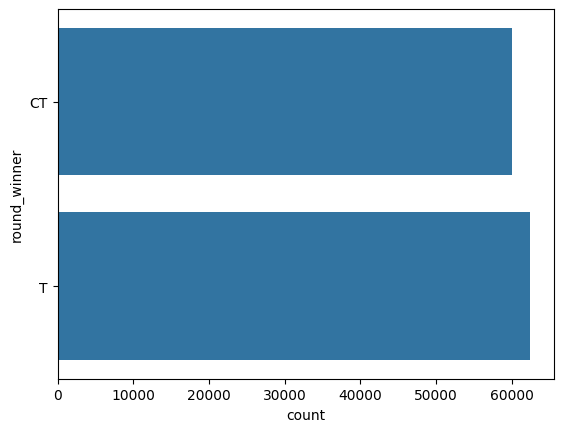

In [8]:
sns.countplot(df['round_winner'])

In [9]:
col = df.columns

In [10]:
# checking for columns for only one value
t=[]
for i in col:
    t.append(df[i].nunique())


In [11]:
# all the columns with only one value
temp =[]
for i in range(len(t)):
    if t[i]==1:
        temp.append(i)
        print(i)

22
30
37
52
58
60


<Axes: ylabel='count'>

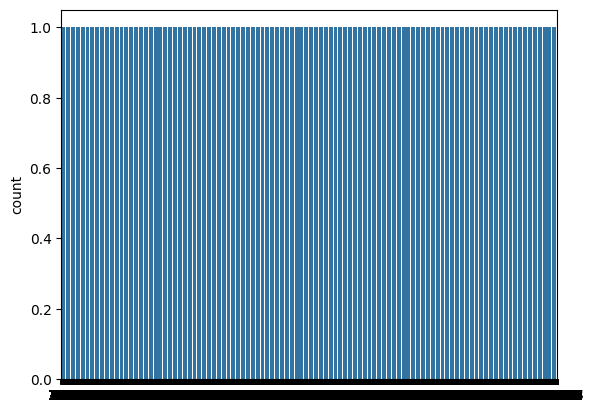

In [12]:
sns.countplot(df[col[22]])

In [13]:
df.drop([col[22], col[30], col[37], col[52], col[58], col[60]], axis = 1, inplace = True) # dropping those columns
print(col[22])
print(col[30])
print(col[37])
print(col[52])
print(col[58])
print(col[60])

ct_weapon_bizon
ct_weapon_g3sg1
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff


In [14]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


### label encoding all categorical values


In [15]:
label_encoder = preprocessing.LabelEncoder() 
df['map'] = label_encoder.fit_transform(df['map'])

In [16]:
df['bomb_planted'] = label_encoder.fit_transform(df['bomb_planted'])

In [17]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

In [18]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [19]:
col = df.columns

In [20]:
c = []
for i in col:
    c.append(df['round_winner'].corr(df[i]))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 91 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int32  
 4   bomb_planted                  122410 non-null  int64  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

## Normalizing the data using Standard Scalar

In [22]:
standscl = preprocessing.StandardScaler()

In [23]:
standscl.fit(df)

,copy,True
,with_mean,True
,with_std,True


In [24]:
standscl.transform(df)

array([[ 1.41582771, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [ 1.06753073, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       [-0.03409385, -1.40057607, -1.40570151, ..., -0.16335636,
        -0.15685461, -1.01981894],
       ...,
       [ 0.31291789,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.0542903 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622],
       [-0.4214985 ,  0.89571055,  1.70405824, ..., -0.16335636,
        -0.15685461,  0.98056622]])

In [25]:
df = standscl.transform(df)

In [26]:
df = pd.DataFrame(df, columns = col)

In [27]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855,-1.019819


In [28]:
df['round_winner'] = label_encoder.fit_transform(df['round_winner'])

## Splitting the data into X and Y

In [29]:
x = df.drop('round_winner', axis = 1)

In [30]:
x.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1.415828,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-1.836777,-1.709542,-0.516186,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
1,1.067531,-1.400576,-1.405702,-1.30641,-0.354764,0.664386,0.695301,0.502008,0.008909,-0.819351,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
2,-0.034094,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,0.203841,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
3,-0.401302,-1.400576,-1.405702,-1.30641,-0.354764,-0.159544,-0.019401,-0.117770,-0.563908,-0.805977,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855
4,1.415277,-1.191823,-1.405702,-1.30641,-0.354764,0.664386,0.695301,-0.714160,-1.709542,0.763351,...,-1.045338,-1.035461,-0.886648,-0.889569,-0.687185,-0.137694,-0.210881,-0.812929,-0.163356,-0.156855


In [31]:
y = df['round_winner']

In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: round_winner, dtype: int64

## Train Test Split


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Training and Evaluation

In [34]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)
pred_1 = model_1.predict(x_test)
cr1    = classification_report(y_test,pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [35]:
model_2 = DecisionTreeClassifier()
model_2.fit(x_train,y_train)
pred_2 = model_2.predict(x_test)
cr2 = classification_report(y_test,pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



In [36]:
model_3 = RandomForestClassifier()
model_3.fit(x_train,y_train)
pred_3 = model_3.predict(x_test)
cr3 = classification_report(y_test,pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12004
           1       0.89      0.87      0.88     12478

    accuracy                           0.88     24482
   macro avg       0.88      0.88      0.88     24482
weighted avg       0.88      0.88      0.88     24482



In [37]:
model_4 = XGBClassifier()
model_4.fit(x_train,y_train)
pred_4 = model_4.predict(x_test)
cr4 = classification_report(y_test,pred_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81     12004
           1       0.83      0.78      0.80     12478

    accuracy                           0.80     24482
   macro avg       0.80      0.80      0.80     24482
weighted avg       0.80      0.80      0.80     24482



In [38]:
model_5 = MLPClassifier()
model_5.fit(x_train,y_train)
pred_5 = model_5.predict(x_test)
cr5 = classification_report(y_test,pred_5)
print(cr5)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     12004
           1       0.78      0.83      0.80     12478

    accuracy                           0.79     24482
   macro avg       0.79      0.79      0.79     24482
weighted avg       0.79      0.79      0.79     24482



f:\CSGO-Round-Winner-Prediction-main\csgo\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
print('Optimal accuracy for random forest classifier:', str(accuracy_score(y_test,pred_3)*100) + '%')

Optimal accuracy for random forest classifier: 87.89314598480516%


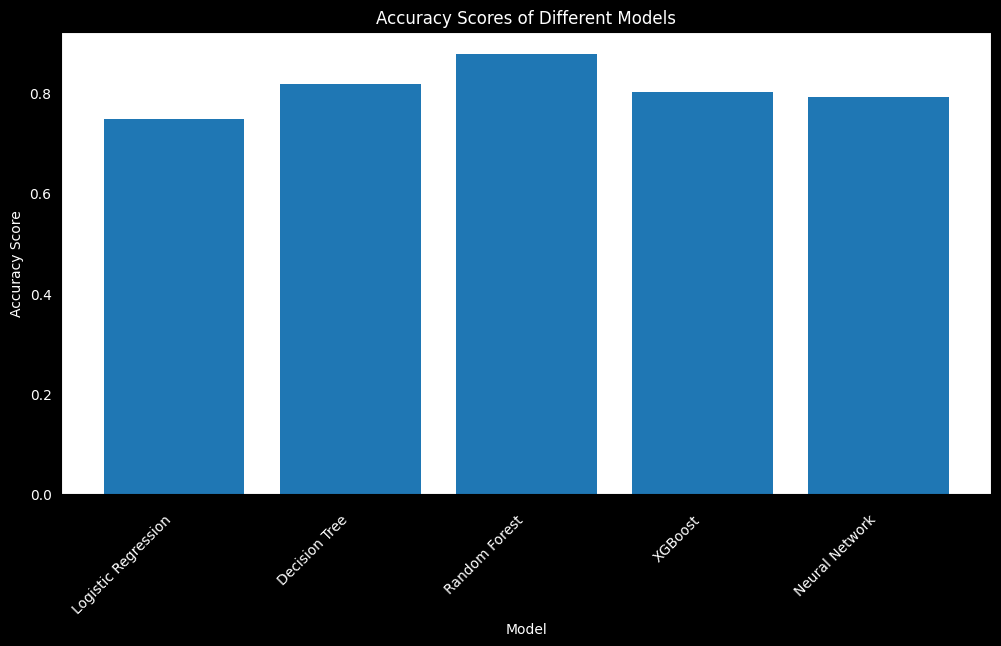

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Accuracy scores of each model
scores = [
    accuracy_score(y_test, pred_1),
    accuracy_score(y_test, pred_2),
    accuracy_score(y_test, pred_3),
    accuracy_score(y_test, pred_4),
    accuracy_score(y_test, pred_5)
]

# Names of each model
names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']

# Set the figure size BEFORE plotting
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(names, scores)

# Set title and labels
plt.title('Accuracy Scores of Different Models', color='white')
plt.xlabel('Model', color='white')
plt.ylabel('Accuracy Score', color='white')

# Customize ticks
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.tick_params(axis='x', pad=10)

# Set background color
plt.gcf().set_facecolor('black')

# Save BEFORE showing
plt.savefig('accuracy_scores.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
from sklearn.svm import SVC

# Create an instance of SVM
svm = SVC(kernel='rbf', C=1, gamma='scale')

# Train the model
svm.fit(x_train, y_train)

# Make predictions on the test set
pred_svm = svm.predict(x_test)

# Evaluate the accuracy of the model
acc_svm = accuracy_score(y_test, pred_svm)

# Print the accuracy score
print(f"SVM Accuracy Score: {acc_svm}")
